In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('owid-covid-data.csv')

print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [13]:
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [4]:
# Define key columns
key_columns = ["date", "location", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]

# Check for missing columns
missing_cols = [col for col in key_columns if col not in df.columns]

if missing_cols:
    print(f"Warning: These columns are missing: {missing_cols}")
else:
    print("All key columns are present!")


All key columns are present!


In [6]:
# Filter for Kenya and make an explicit copy to avoid modifying the slice
kenya_df = df[df["location"] == "Kenya"].copy()  # <-- Add `.copy()`

# Drop rows with missing dates or critical values
critical_columns = ["date", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]
kenya_df.dropna(subset=critical_columns, inplace=True)

# Display cleaned data
print(kenya_df.head())


       iso_code continent location        date  total_cases  new_cases  \
158213      KEN    Africa    Kenya  2021-03-04     106801.0      331.0   
158219      KEN    Africa    Kenya  2021-03-10     109643.0      479.0   
158223      KEN    Africa    Kenya  2021-03-14     112805.0      870.0   
158226      KEN    Africa    Kenya  2021-03-17     115031.0     1064.0   
158233      KEN    Africa    Kenya  2021-03-24     123167.0     1127.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
158213             288.714        1866.0         3.0                3.857   
158219             453.286        1886.0         7.0                3.286   
158223             634.714        1908.0         7.0                4.857   
158226             769.714        1925.0         7.0                5.571   
158233            1162.286        2048.0        25.0               17.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
158213  ...

In [7]:
# Define key columns to check for missing values
critical_columns = ["date", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]

# Drop rows with missing values in any of these columns
kenya_df.dropna(subset=critical_columns, inplace=True)

# Display cleaned dataset
print(kenya_df.head())


       iso_code continent location        date  total_cases  new_cases  \
158213      KEN    Africa    Kenya  2021-03-04     106801.0      331.0   
158219      KEN    Africa    Kenya  2021-03-10     109643.0      479.0   
158223      KEN    Africa    Kenya  2021-03-14     112805.0      870.0   
158226      KEN    Africa    Kenya  2021-03-17     115031.0     1064.0   
158233      KEN    Africa    Kenya  2021-03-24     123167.0     1127.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
158213             288.714        1866.0         3.0                3.857   
158219             453.286        1886.0         7.0                3.286   
158223             634.714        1908.0         7.0                4.857   
158226             769.714        1925.0         7.0                5.571   
158233            1162.286        2048.0        25.0               17.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
158213  ...

In [8]:
# Convert the 'date' column to datetime format
kenya_df["date"] = pd.to_datetime(kenya_df["date"])

# Display first few rows to confirm changes
print(kenya_df.head())
print(kenya_df.dtypes)  # Verify 'date' is now datetime


       iso_code continent location       date  total_cases  new_cases  \
158213      KEN    Africa    Kenya 2021-03-04     106801.0      331.0   
158219      KEN    Africa    Kenya 2021-03-10     109643.0      479.0   
158223      KEN    Africa    Kenya 2021-03-14     112805.0      870.0   
158226      KEN    Africa    Kenya 2021-03-17     115031.0     1064.0   
158233      KEN    Africa    Kenya 2021-03-24     123167.0     1127.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
158213             288.714        1866.0         3.0                3.857   
158219             453.286        1886.0         7.0                3.286   
158223             634.714        1908.0         7.0                4.857   
158226             769.714        1925.0         7.0                5.571   
158233            1162.286        2048.0        25.0               17.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
158213  ...      

In [9]:
kenya_df.interpolate(method="linear", inplace=True)

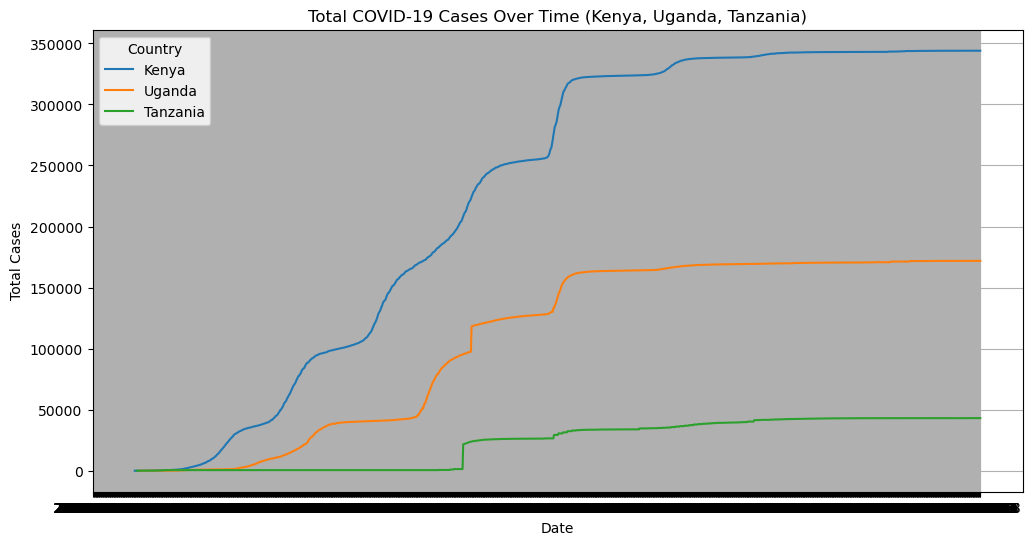

In [14]:
# Filter for Kenya, Uganda, and Tanzania
import matplotlib.pyplot as plt

countries = ["Kenya", "Uganda", "Tanzania"]
df_filtered = df[df["location"].isin(countries)]

# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_filtered[df_filtered["location"] == country]
    plt.plot(country_df["date"], country_df["total_cases"], label=country)

# Customize the plot
plt.title("Total COVID-19 Cases Over Time (Kenya, Uganda, Tanzania)")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()


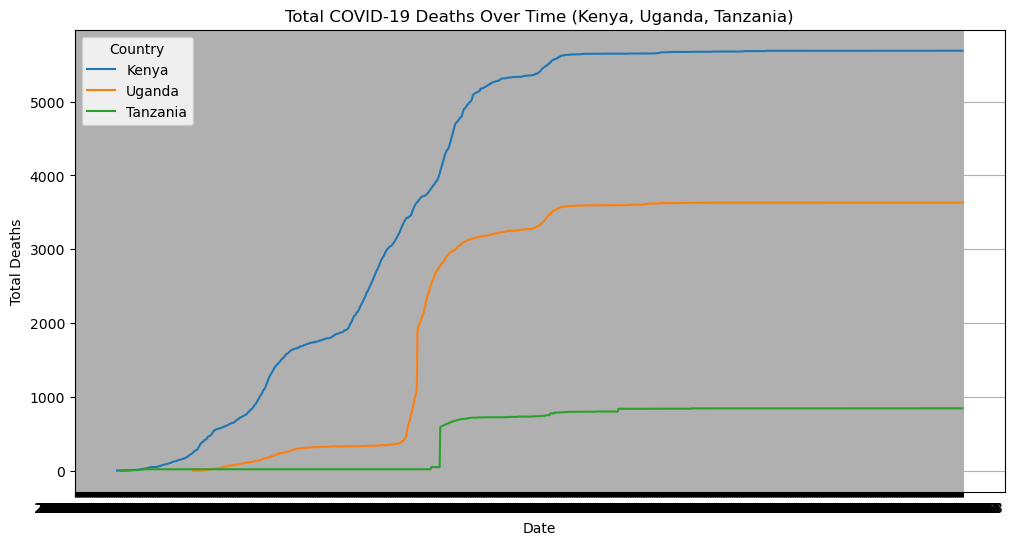

In [16]:
#plot total deaths over time
plt.figure(figsize = (12,6))
for country in countries:
    country_df = df_filtered[df_filtered['location'] == country]
    plt.plot(country_df["date"], country_df["total_deaths"], label=country)

# Customize the plot
plt.title("Total COVID-19 Deaths Over Time (Kenya, Uganda, Tanzania)")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()

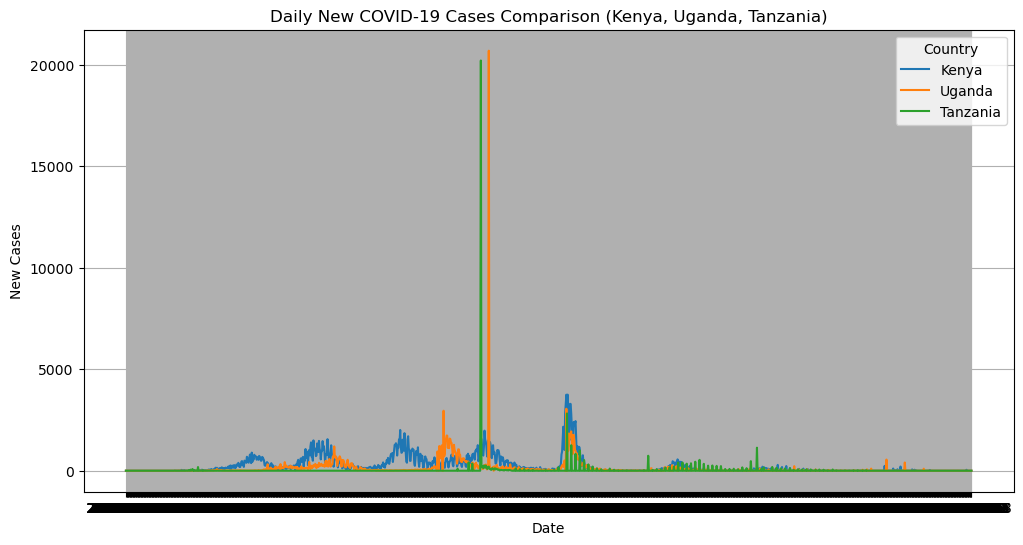

In [17]:

plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_filtered[df_filtered["location"] == country]
    plt.plot(country_df["date"], country_df["new_cases"], label=country)

# Customize the plot
plt.title("Daily New COVID-19 Cases Comparison (Kenya, Uganda, Tanzania)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()
